In [2]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Read Data

data = pd.read_csv('/home/rohan/Documents/Kaggle_Project/HR Analytics/HR_comma_sep.csv')
data[0:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [71]:
#Find the missing values

data.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

Great! this dataset has no missing values

In [5]:
data.shape

(14999, 10)

Ok, so there are 10 features and records of 14999 employees in this dataset

In [6]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [7]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000



So the rate at which employees are leaving the company is 23.80% (from the mean of 'left' column)

Mean satisfaction level of the employees are 0.61

Let's check the satisfaction level of employees

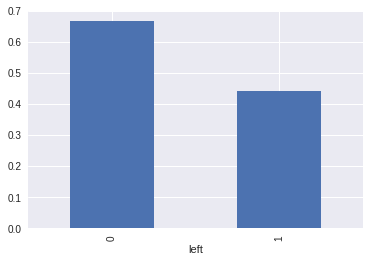

In [8]:
data.groupby('left').satisfaction_level.mean().plot(kind='bar')


As expected, the satifaction level for the employees who left is less that those who haven't

Now let's see how monthly working hours has an effect on employee leaving

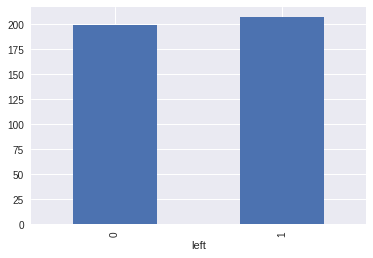

In [73]:
data.groupby('left').average_montly_hours.mean().plot(kind='bar')

So, from this it is certainly clear that monthly working hours does not affect much in decision making of the employee to leave the company.

Now, let's see if number of projects have any role to play in employee leaving the company

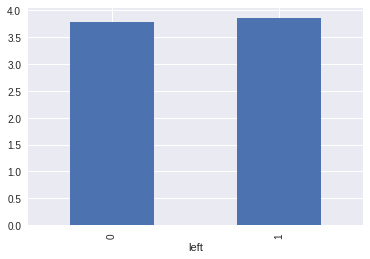

In [10]:
data.groupby('left').number_project.mean().plot(kind='bar')

Even number of projects handled by the employee carry less weightage in employee turnover

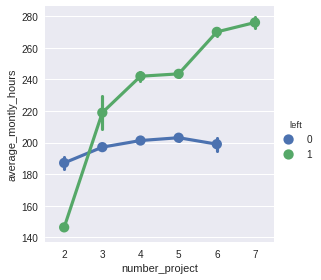

In [35]:
sns.factorplot('number_project','average_montly_hours',hue='left',data=data )

On combining number of projects handled and monthly working hours, one thing can be for sure concluded from above plot.

Employees working on < 3 project and working for < 160 hours; as well as employees working on > 5 projects and for > 250 hours are more likely to leave the company. This is the important finding.

(Effect of number of projects and average monthly working hours on turnover was not visible from bar graph)

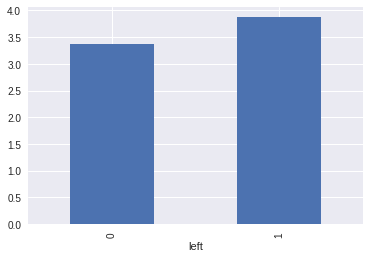

In [11]:
data.groupby('left').time_spend_company.mean().plot(kind='bar')

Now this is a real issue for the company as more older employees are more likely to leave the company.

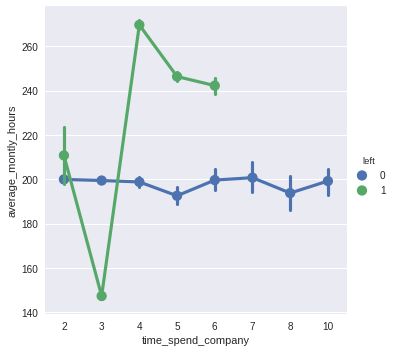

In [12]:
sns.factorplot('time_spend_company','average_montly_hours',hue='left',data=data,size=5)

From the above two factor plots there's one more finding. Irrespective of their number of years spend or number of projects handled, employees are more likely to leave if they are working less than 180 hours or more than 210 hours.

Maybe be 180-210 hours are the preferable amount of hours that employees are comfortable at.

Let's see if any sort of accident at work has effect on turnover

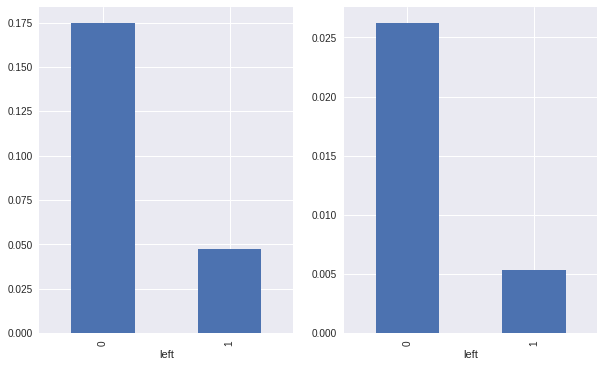

In [26]:
fig, axs = plt.subplots(ncols=2,figsize=(10,6))
data.groupby('left').Work_accident.mean().plot(kind='bar',ax = axs[0])
data.groupby('left').promotion_last_5years.mean().plot(kind='bar',ax=axs[1])


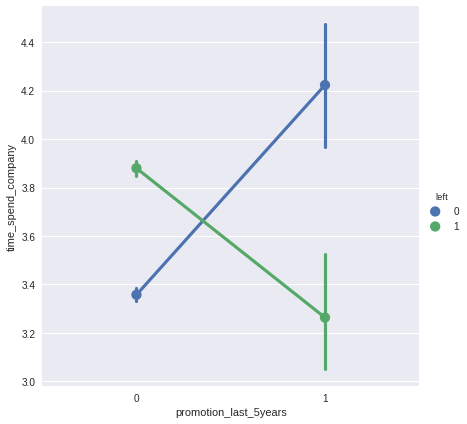

In [30]:
sns.factorplot('promotion_last_5years','time_spend_company',hue = 'left',data=data,size=6)

Previously we have found that more older employees are leaving the company. Now here is one of the reasons why?

The older employees who haven't receive promotion in last 5 years are more likely to leave the company.

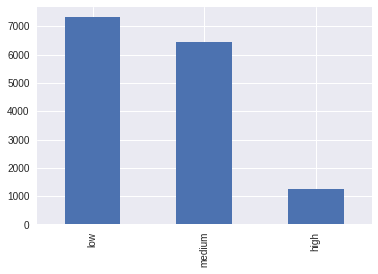

In [31]:
data.salary.value_counts().plot(kind='bar')

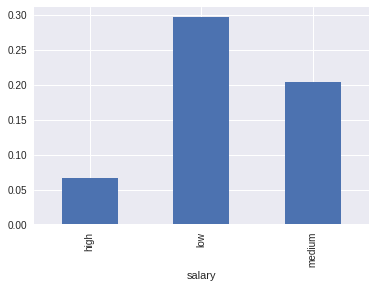

In [32]:
data.groupby('salary').left.mean().plot(kind='bar')

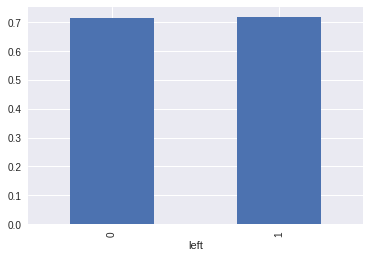

In [37]:
data.groupby('left').last_evaluation.mean().plot(kind='bar')

Salary and evaluation doesn't seems to be the reason behind employees leaving the company.

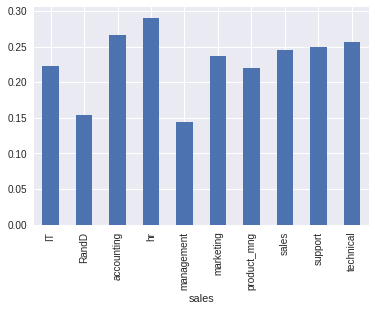

In [56]:
data.groupby('sales').left.mean().plot(kind='bar')

In [64]:
data.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

Now, let's find the number of employees who has worked for atleast 5 years and then left the company, for each department

In [54]:
old_employee = data['sales'][data['time_spend_company']>=5]
old_employee.value_counts()
old_employee_left = old_employee[data['left']==1]
old_employee_left.value_counts()

sales          288
technical      210
support        179
IT              78
product_mng     69
marketing       59
hr              49
accounting      48
RandD           44
management      18
Name: sales, dtype: int64

In [74]:
ratio_old_sales_left = float(old_employee_left.value_counts()[0])/float(data.sales.value_counts()[0])
ratio_old_technical_left = float(old_employee_left.value_counts()[1])/float(data.sales.value_counts()[1])
ratio_old_support_left  = float(old_employee_left.value_counts()[2])/float(data.sales.value_counts()[2])
ratio_old_IT_left = float(old_employee_left.value_counts()[3])/float(data.sales.value_counts()[3])
ratio_old_prodmgn_left = float(old_employee_left.value_counts()[4])/float(data.sales.value_counts()[4])
ratio_old_marketing_left = float(old_employee_left.value_counts()[5])/float(data.sales.value_counts()[5])
ratio_old_hr_left = float(old_employee_left.value_counts()[6])/float(data.sales.value_counts()[6])
raio_old_accounting_left = float(old_employee_left.value_counts()[7])/float(data.sales.value_counts()[7])
ratio_old_RandD_left = float(old_employee_left.value_counts()[8])/float(data.sales.value_counts()[8])
ratio_old_management_left = float(old_employee_left.value_counts()[9])/float(data.sales.value_counts()[9])

print 'Ratio of Old Employees leaving from Sales: ',ratio_old_sales_left
print 'Ratio of Old Employees leaving from Technical: ',ratio_old_technical_left
print 'Ratio of Old Employees leaving from Support: ',ratio_old_support_left
print 'Ratio of Old Employees leaving from IT: ',ratio_old_IT_left
print 'Ratio of Old Employees leaving from Product Management: ',ratio_old_prodmgn_left
print 'Ratio of Old Employees leaving from Marketing: ',ratio_old_marketing_left
print 'Ratio of Old Employees leaving from HR: ',ratio_old_hr_left
print 'Ratio of Old Employees leaving from R&D: ',ratio_old_RandD_left
print 'Ratio of Old Employees leaving from management: ',ratio_old_management_left

Ratio of Old Employees leaving from Sales:  0.0695652173913
Ratio of Old Employees leaving from Technical:  0.0772058823529
Ratio of Old Employees leaving from Support:  0.0803050695379
Ratio of Old Employees leaving from IT:  0.0635696821516
Ratio of Old Employees leaving from Product Management:  0.0764966740576
Ratio of Old Employees leaving from Marketing:  0.0687645687646
Ratio of Old Employees leaving from HR:  0.0622617534943
Ratio of Old Employees leaving from R&D:  0.0595399188092
Ratio of Old Employees leaving from management:  0.0285714285714


So we can conclude that the old employees leaving from technical and product management department is the highest.

# Final Conclusion

1. Employees who work < 180 hours or > 210 hours per month are more likely to leave the company. 

2. Also the older employees who haven't been promoted in the last 5 years are more likely to leave. 

3. Further it has been found that older employees working in technical and product management department are the highest